In [1]:
# import sagemaker
# import boto3
# from sagemaker import get_execution_role

# region = boto3.Session().region_name

# session = sagemaker.Session()
# bucket = session.default_bucket()
# prefix = 'sagemaker/autopilot-dm'

# role = get_execution_role()

# sm = boto3.Session().client(service_name='sagemaker',region_name=region)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Property Prices in Tunisia.csv')
df

df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [4]:
df.shape

(12748, 9)

In [5]:
df.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [6]:
df.isnull().sum()

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64

In [7]:
(df==-1).sum()

category             0
room_count        3415
bathroom_count    3415
size              3415
type                 0
price                0
city                 0
region               0
log_price            0
dtype: int64

#### We can see that :
* The presence of -1 as a value => It is NULL value
* The number of -1 values is equal in 3 columns
* The presence of outliers in the data 
* The 'price' varies from 100 to 10e+11, and we can explain it using the fact that our data contains propoerties that are for 'Rent' (À Louer) and for 'Sale' (À Vendre) in the 'type' column

### Data Visualisation 

#### To get the best visualizations, we will replace all -1 values with Null (nan), and we willm drop duplicate rows

In [8]:
#Replace -1 with nan
df = df.replace(-1,np.float('nan'))

In [9]:
#Drop duplicate rows
df.drop_duplicates(keep = 'first', inplace = True) 

#### **'type' column**

In [10]:
#Start with the 'type' column
print(df.type.value_counts())

À Vendre    6556
À Louer     4579
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

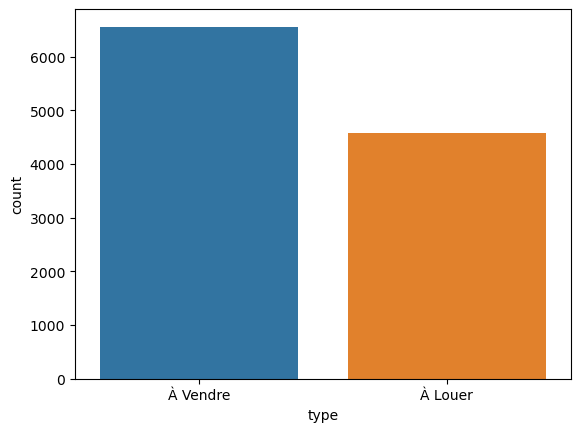

In [11]:
sns.countplot(data = df, x = 'type')

#### 'category' column

In [12]:
#category column
print(df.category.nunique())
print(df.category.unique())

7
['Terrains et Fermes' 'Appartements' 'Locations de vacances'
 'Magasins, Commerces et Locaux industriels' 'Maisons et Villas'
 'Colocations' 'Bureaux et Plateaux']


<AxesSubplot:xlabel='category', ylabel='count'>

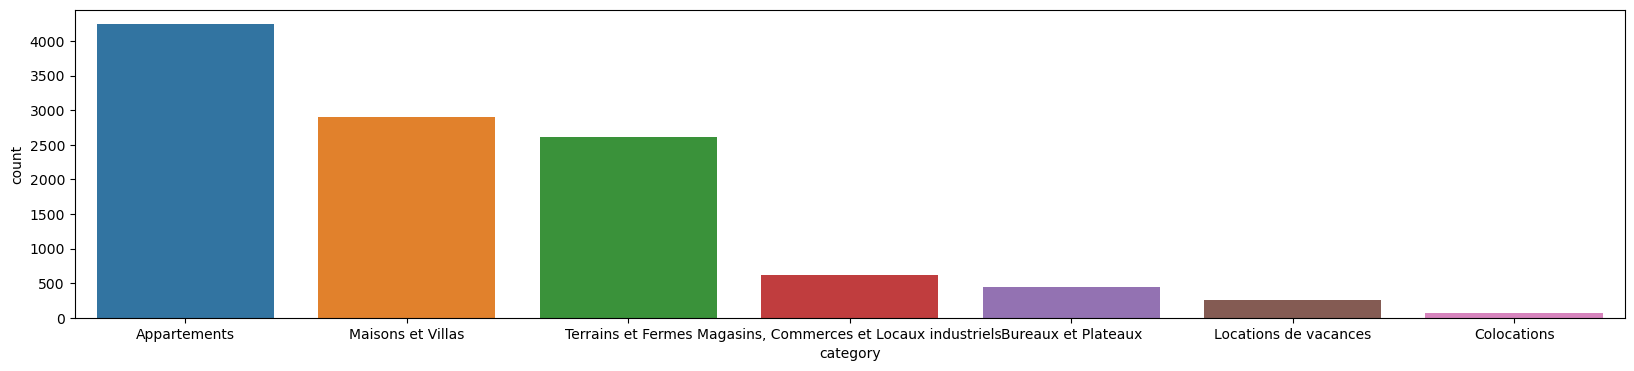

In [13]:
#A quick barplot
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'category', order=df.category.value_counts().index)

#### 'city' column

In [14]:
print(df.city.nunique())
print(df.city.unique())

24
['Ariana' 'Béja' 'Ben arous' 'Bizerte' 'Gabès' 'Gafsa' 'Jendouba'
 'Kairouan' 'Kasserine' 'Kébili' 'La manouba' 'Le kef' 'Mahdia' 'Médenine'
 'Monastir' 'Sidi bouzid' 'Siliana' 'Sousse' 'Tataouine' 'Tozeur'
 'Zaghouan' 'Sfax' 'Nabeul' 'Tunis']


<AxesSubplot:xlabel='count', ylabel='city'>

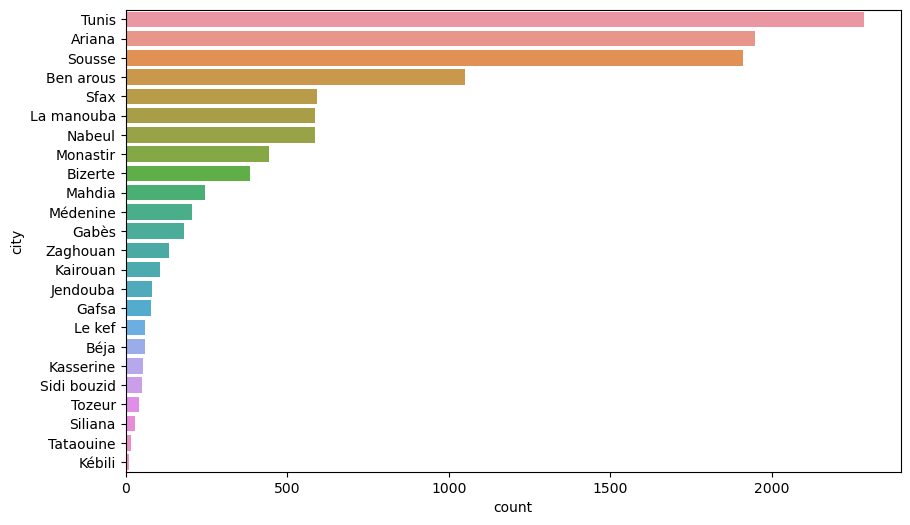

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, y = 'city', order = df.city.value_counts().index)

#### 'region' have  high cardinality: 257 distinct values

#### 'room_count' column

In [16]:
print(df.room_count.nunique())
print(df.room_count.unique())

18
[nan  2.  1.  4.  5.  3.  6.  8.  7. 11. 12. 10.  9. 18. 14. 13. 20. 15.
 16.]


In [17]:
print(df.type.unique())

['À Vendre' 'À Louer']


<AxesSubplot:xlabel='room_count', ylabel='count'>

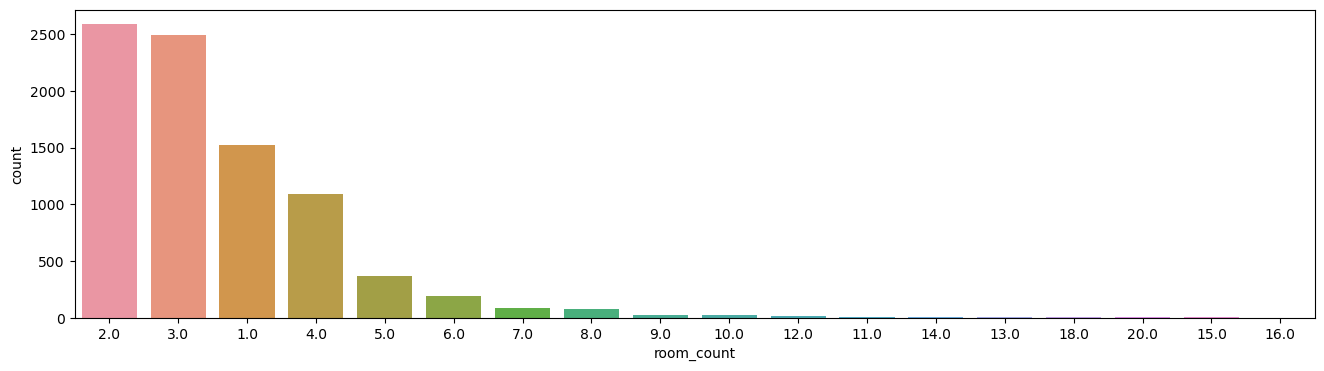

In [18]:
plt.figure(figsize=(16, 4))
sns.countplot(data = df, x = 'room_count', order = df.room_count.value_counts().index)

'bathroom_count' column

In [19]:
print(df.bathroom_count.nunique())
print(df.bathroom_count.unique())

10
[nan  1.  2.  3.  4.  0.  5.  8.  6. 10.  7.]


<AxesSubplot:xlabel='bathroom_count', ylabel='count'>

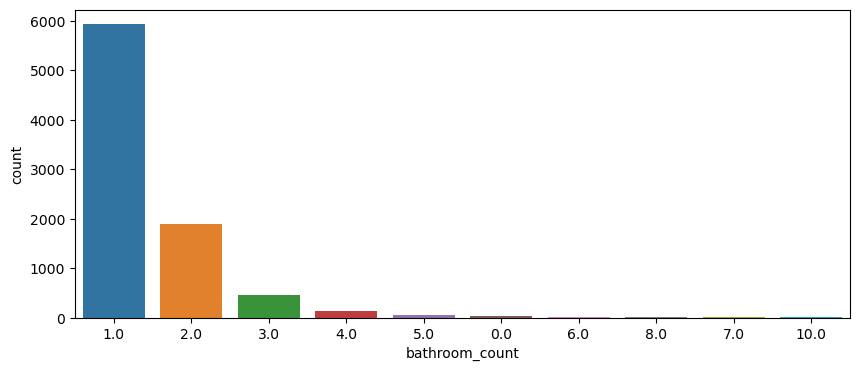

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(data = df, x = 'bathroom_count', order = df.bathroom_count.value_counts().index)

'size' column

<AxesSubplot:xlabel='size', ylabel='Density'>

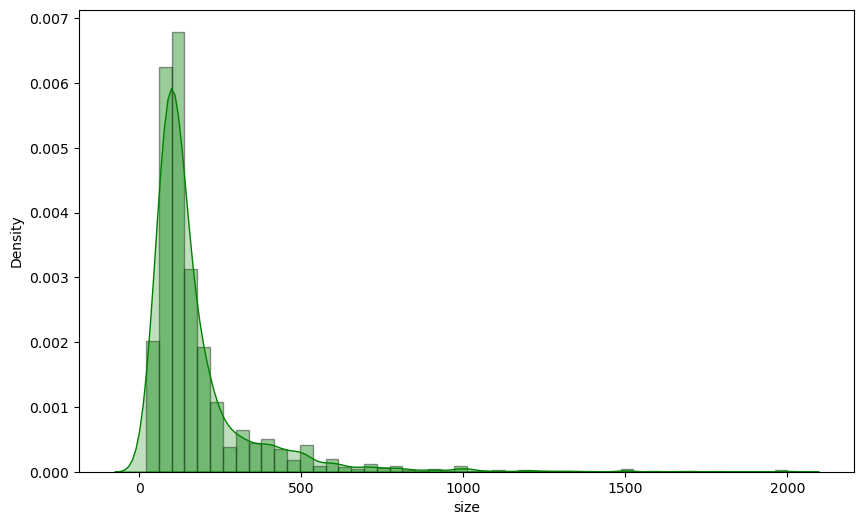

In [21]:
#Use a density plot
plt.figure(figsize=(10, 6))
sns.distplot(df['size'], hist=True, kde=True, 
              color = 'green',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

'Price' Column

<AxesSubplot:xlabel='size', ylabel='price'>

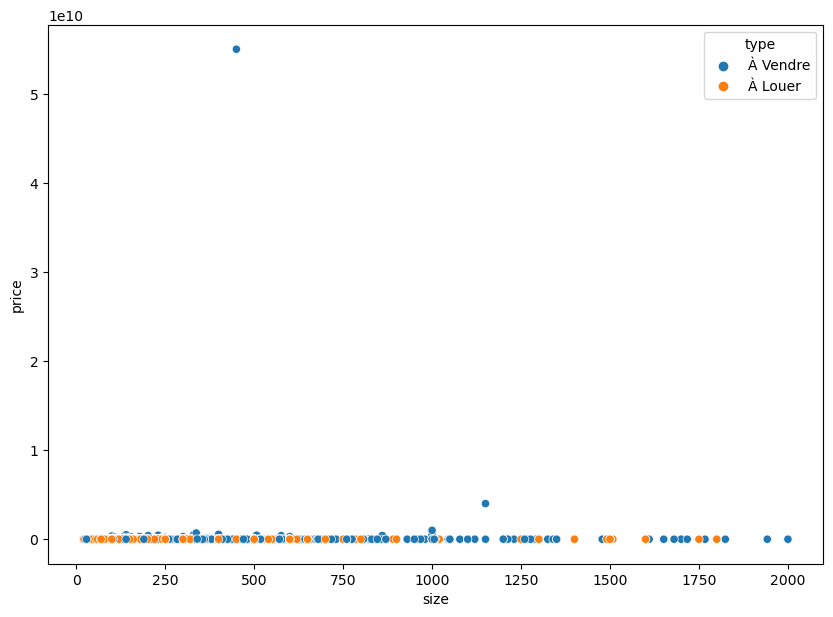

In [22]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="price", hue="type")

<AxesSubplot:xlabel='price', ylabel='Density'>

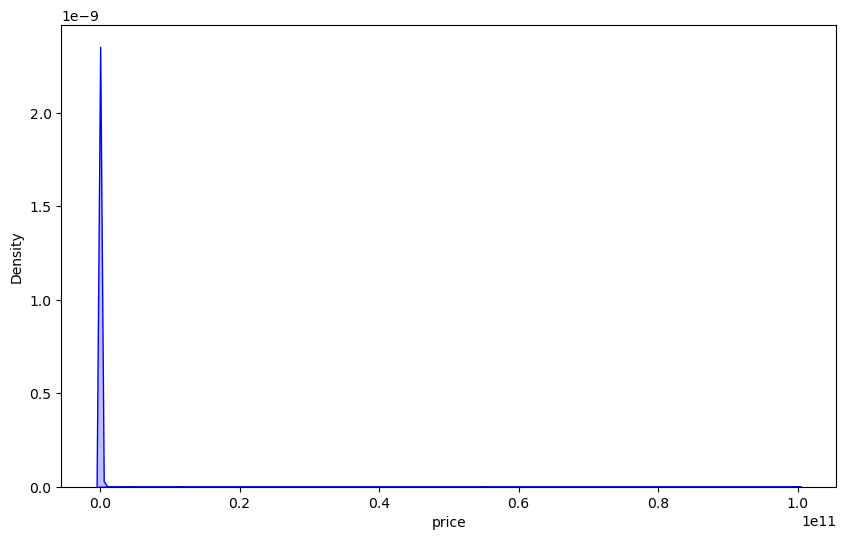

In [23]:
#Use a density plot
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], hist=False, kde=True, 
              color = 'blue',bins = 50,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

<AxesSubplot:xlabel='size', ylabel='log_price'>

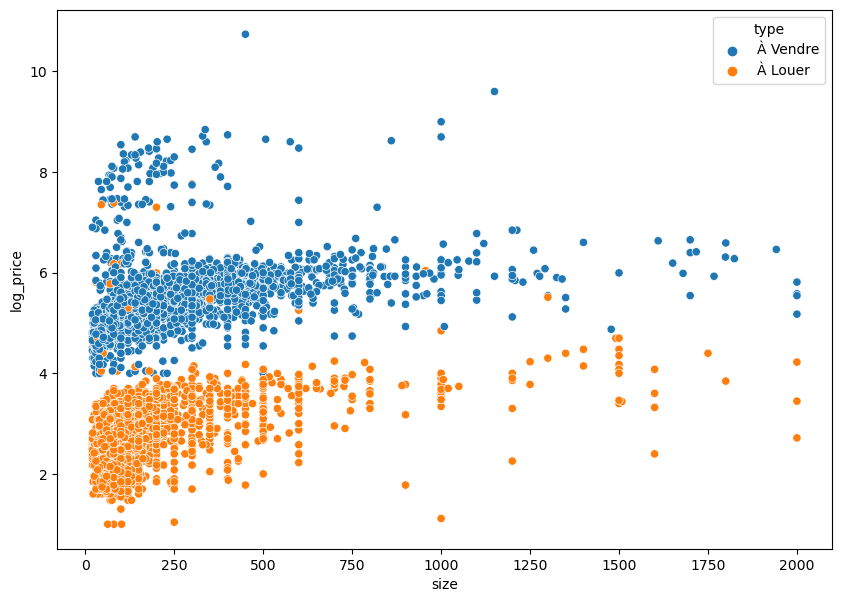

In [24]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = df , x="size", y="log_price", hue="type")

<AxesSubplot:xlabel='log_price', ylabel='Density'>

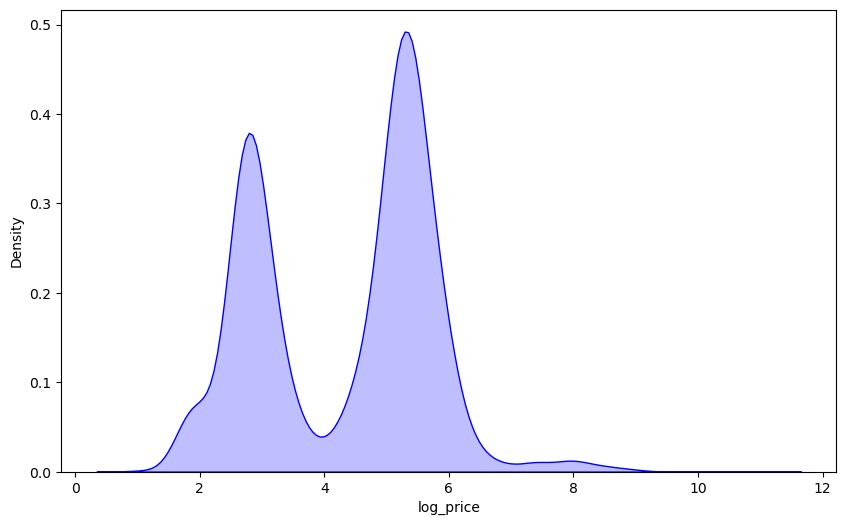

In [25]:
#Use a density plot
plt.figure(figsize=(10, 6))
sns.distplot(df['log_price'], hist=False, kde=True, 
              color = 'blue',bins = 20,
             kde_kws={'linewidth': 1,'shade': True },
             hist_kws={'edgecolor':'black'})

As you can see, when we use the price, I cannot really see my distribution. We called **Skewed Data**
<img src='https://www.mathsisfun.com/data/images/skewed-distribution.svg' alt='skewed data' width = 400px>

Before going on, lets delete those null values, there is a high probability that they are all related

In [26]:
#Require that many non-NA values.
df.dropna(thresh = 9, inplace=True)

<AxesSubplot:xlabel='category', ylabel='count'>

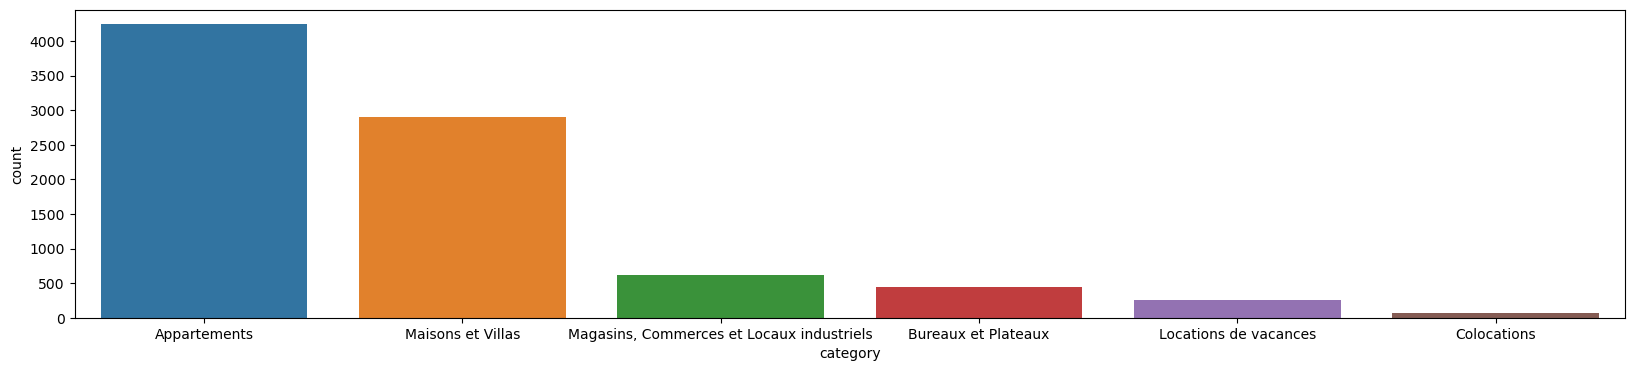

In [27]:
#A quick barplot again on the category
plt.figure(figsize=(20, 4))
sns.countplot(data = df, x = 'category', order=df.category.value_counts().index)

Split our data based on the column Type

In [28]:
dfVendre = df[df.type == 'À Vendre']
dfLouer = df[df.type == 'À Louer']

In [29]:
print(dfVendre.shape)
print(dfLouer.shape)

(3949, 9)
(4579, 9)


<AxesSubplot:xlabel='size', ylabel='log_price'>

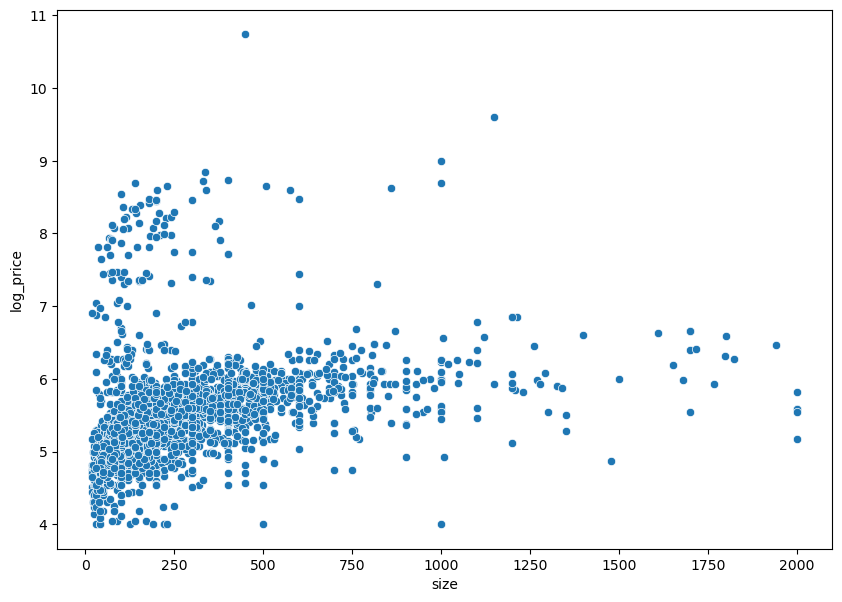

In [30]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre , x="size", y="log_price")

In [31]:
# ### Before moving to the outlier removal, let's understand some concepts : 
# * Standard Deviation or STD : measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.
# <img src="https://campaign-image.com/zohocampaigns/180919000117207004_zc_v14_calculate_a_sample_standard_deviation_3126345_v4_cs_01_5b76f58f46e0fb0050bb4ab2.png" alt="std" width = '500px'>

In [32]:
# * Interquartile range :  aequal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q₃ − Q₁ : A measurement used in statistics of a value's relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean
# <img src="https://blogs.sas.com/content/graphicallyspeaking/files/2016/12/Box_Key_SG.png" alt="std" width = '500px'>

In [33]:
z1 = np.abs(stats.zscore(dfVendre.log_price)) #Calculate Z score for dfVebdre
z2 = np.abs(stats.zscore(dfLouer.log_price))  #Calculate Z score for dfAchat

In [34]:
dfVendre_O  = dfVendre[(z1 < 2.5)]
dfLouer_O  = dfLouer[(z2 < 2.5)]
print('Number of removed rows : ',dfVendre.shape[0]-dfVendre_O.shape[0])
print('Number of removed rows : ',dfLouer.shape[0]-dfLouer_O.shape[0])

Number of removed rows :  112
Number of removed rows :  83


<AxesSubplot:xlabel='size', ylabel='price'>

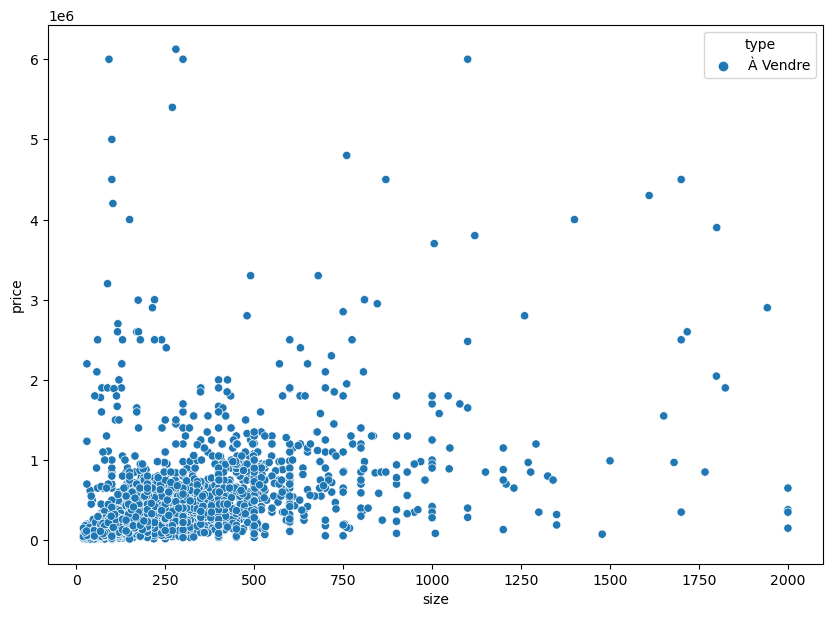

In [35]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfVendre_O , x="size", y="price", hue="type")

<AxesSubplot:xlabel='size', ylabel='price'>

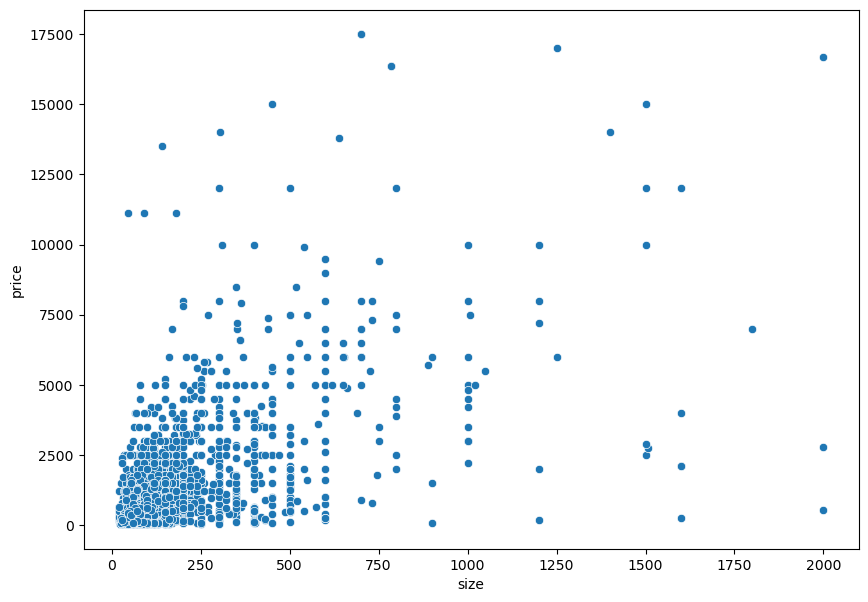

In [36]:
#Scatter plot price against the size, with the type as a hue
plt.figure(figsize=(10, 7))
sns.scatterplot(data = dfLouer_O , x="size", y="price")

Import necessary things

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

First, we create our pipeline, so we can use some function and avoid repetition

In [38]:
#Separate categorical values and Numerical Values
Cat_Col = ['category','city','type']
Num_Col = ['room_count','bathroom_count' , 'size']



In [39]:
Pipeline = ColumnTransformer([
    ("num", StandardScaler(), Num_Col),
    ('cat', OrdinalEncoder(),Cat_Col)
])

## Approach 1 : Build 2 models

In [40]:
#Separate Target and Features
Xl = dfLouer_O.drop(['price','log_price','region'],axis = 1)
yl = dfLouer_O.price

In [41]:
#Train_test split
xl_train,xl_test,yl_train,yl_test = train_test_split(Xl,yl,test_size = 0.2,random_state = 42)

In [42]:
#Use the pipeline to transform my features
xl_train = Pipeline.fit_transform(xl_train)
xl_test = Pipeline.transform(xl_test)

In [43]:
#Define my models
names = ["Linear Regression", "SGD Regressor", "Random Forest Regressor"]
Regressors = [LinearRegression(),SGDRegressor(),RandomForestRegressor() ]

In [44]:
for name, Reg in zip(names, Regressors):
  Reg.fit(xl_train, yl_train)
  preds = Reg.predict(xl_test)
  MAE = mean_absolute_error(yl_test,preds)
  R2 = r2_score(yl_test,preds)
  print (name, ' : mean absolute error  :  ', "%.2f" %(MAE), 'R2_Score : ', "%.2f" %(R2))

Linear Regression  : mean absolute error  :   569.47 R2_Score :  0.46
SGD Regressor  : mean absolute error  :   552.79 R2_Score :  0.44
Random Forest Regressor  : mean absolute error  :   462.96 R2_Score :  0.58


In [45]:
mymodel = RandomForestRegressor()
mymodel.fit(xl_train,yl_train)

RandomForestRegressor()

In [46]:
Xl.iloc[[85]]

,category,room_count,bathroom_count,size,type,city
251,Maisons et Villas,3.0,1.0,155.0,À Louer,Ariana


In [47]:
Xl.iloc[[85]]

,category,room_count,bathroom_count,size,type,city
251,Maisons et Villas,3.0,1.0,155.0,À Louer,Ariana


In [48]:
yl.iloc[85]

465.0

In [49]:
mymodel.predict(Pipeline.transform(Xl.iloc[[85]]))

array([547.75])

### Now it is up to you to tune the model

## Approach 2 : Build a single non linear model

In [186]:
#Concat the two dataframes
df_final = pd.concat([dfLouer_O,dfVendre_O])

In [188]:
df_final.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,Ariana,Autres villes,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,Ariana,Borj Louzir,2.826075
7,"Magasins, Commerces et Locaux industriels",2.0,1.0,20.0,À Louer,650.0,Ariana,Borj Louzir,2.812913


In [189]:

# from sklearn.preprocessing import LabelEncoder
# # creating initial dataframe
# bridge_types = ('Appartements','Locations de vacances','Truss','Cantilever','Tied Arch','Suspension','Cable')
# bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
# bridge_df

In [190]:
for col in df:
  print(df[col].unique())
  print(df[col].value_counts())

[0 3 4 5 2 1]
0    4240
5    2899
4     622
1     443
3     259
2      65
Name: category, dtype: int64
[ 1  0  3  4  2  5  7  6 10 11  9  8 16 13 12 17 14 15]
1     2588
2     2497
0     1521
3     1094
4      370
5      196
6       84
7       81
8       28
9       26
11      15
10       9
13       6
12       5
16       3
17       2
14       2
15       1
Name: room_count, dtype: int64
[1 2 3 4 0 5 8 6 9 7]
1    5932
2    1887
3     463
4     130
5      47
0      35
6      12
8       9
7       8
9       5
Name: bathroom_count, dtype: int64
[ 60  70  93  50  80   0  20 505 198 118 130 160 221 179 110 140  69  74
  59 504 273 137 278  85 319  45 341  55 380 352 234 100  54  90 131 493
 125 106  88  10 216  48 105 206  44  30  83 143 249 168  63  56 302 123
  36 116 120   7  16 145 276 344 247 188 166  67  78  40  65  52 230  42
 289 259  32 133  95 422 141 500 111 326 167  37 135  75 461 307 115 150
 446  46 170 214 320 155 390  25  64  97 154  87 102 392 171 149 332 255
 104 334  38 370 

In [191]:
for j in df.columns.values.tolist() :
    le = LabelEncoder()
    df[j] = le.fit_transform(df[j])
df

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,0,1,1,60,0,61,0,6,61
3,3,0,1,70,0,12,0,6,12
4,0,1,2,93,1,366,0,5,366
5,3,0,1,50,0,14,0,6,14
6,0,1,1,80,0,97,0,18,97
...,...,...,...,...,...,...,...,...,...
12742,5,4,3,284,1,711,22,6,711
12744,0,0,1,80,0,90,22,6,90
12745,5,2,1,464,1,661,22,111,661
12746,5,2,1,170,1,431,22,111,431


In [192]:
for col in df:
  print(df[col].unique())
  print(df[col].value_counts())

[0 3 4 5 2 1]
0    4240
5    2899
4     622
1     443
3     259
2      65
Name: category, dtype: int64
[ 1  0  3  4  2  5  7  6 10 11  9  8 16 13 12 17 14 15]
1     2588
2     2497
0     1521
3     1094
4      370
5      196
6       84
7       81
8       28
9       26
11      15
10       9
13       6
12       5
16       3
17       2
14       2
15       1
Name: room_count, dtype: int64
[1 2 3 4 0 5 8 6 9 7]
1    5932
2    1887
3     463
4     130
5      47
0      35
6      12
8       9
7       8
9       5
Name: bathroom_count, dtype: int64
[ 60  70  93  50  80   0  20 505 198 118 130 160 221 179 110 140  69  74
  59 504 273 137 278  85 319  45 341  55 380 352 234 100  54  90 131 493
 125 106  88  10 216  48 105 206  44  30  83 143 249 168  63  56 302 123
  36 116 120   7  16 145 276 344 247 188 166  67  78  40  65  52 230  42
 289 259  32 133  95 422 141 500 111 326 167  37 135  75 461 307 115 150
 446  46 170 214 320 155 390  25  64  97 154  87 102 392 171 149 332 255
 104 334  38 370 

In [193]:
df

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,0,1,1,60,0,61,0,6,61
3,3,0,1,70,0,12,0,6,12
4,0,1,2,93,1,366,0,5,366
5,3,0,1,50,0,14,0,6,14
6,0,1,1,80,0,97,0,18,97
...,...,...,...,...,...,...,...,...,...
12742,5,4,3,284,1,711,22,6,711
12744,0,0,1,80,0,90,22,6,90
12745,5,2,1,464,1,661,22,111,661
12746,5,2,1,170,1,431,22,111,431


In [199]:
#Features and Target
X = df_final.drop(['price','log_price','region'],axis = 1)
y = df_final.price
#Our Model
model = RandomForestRegressor()

In [200]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [205]:
# #Use the pipeline to transform my test features
# x_train = Pipeline.fit_transform(x_train)
# x_test = Pipeline.transform(x_test)
x_train


,category,room_count,bathroom_count,size,type,city
9701,Maisons et Villas,3.0,2.0,1000.0,À Vendre,Nabeul
11294,Maisons et Villas,3.0,1.0,120.0,À Louer,Tunis
8440,Maisons et Villas,5.0,1.0,170.0,À Vendre,Sousse
6399,Bureaux et Plateaux,2.0,1.0,120.0,À Louer,Sousse
7815,Appartements,2.0,1.0,105.0,À Vendre,Sousse
...,...,...,...,...,...,...
848,Appartements,1.0,1.0,80.0,À Louer,Ariana
237,Bureaux et Plateaux,2.0,1.0,100.0,À Louer,Ariana
11850,Maisons et Villas,6.0,2.0,500.0,À Vendre,Tunis
8429,Appartements,2.0,1.0,97.0,À Vendre,Sousse


In [204]:
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Maisons et Villas'

In [116]:
#Generate Predictions
preds = model.predict(x_test)

In [117]:
#Evaluation
result = (mean_absolute_error(y_test,preds))
print(result)

79563.546150673


Here we should evaluate our model differently, we will use the evaluation of dfLouer

In [118]:
preds_l = model.predict(xl_test)

In [119]:
result = (mean_absolute_error(yl_test,preds_l))
print(result)

528.834573247555


In [120]:
X.iloc[[85]]

,category,room_count,bathroom_count,size,type,city
251,Maisons et Villas,3.0,1.0,155.0,À Louer,Ariana


In [121]:
y.iloc[85]

465.0

In [122]:
model.predict(Pipeline.transform(X.iloc[[85]]))

array([546.23])

Here come the power of the non linear models, they can see the difference between different types

### Tuning, yay !

Let's try to change the model

In [123]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

In [124]:
#Initialize my gridsearch parameters
Grid_par = [
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6]},
    {'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [2,3,4],'max_depth' : [10,20,30]},
    {'bootstrap': [False], 'n_estimators' : [5,10,20,30,50,100] , 'max_features' : [4,5,6],'max_depth' : [10,20,30]}]
    
model = RandomForestRegressor(n_jobs=-1)

In [125]:
GridSearch = GridSearchCV(estimator= model , param_grid=Grid_par, cv = 5,
                         scoring='neg_mean_absolute_error', return_train_score=True)

In [126]:
start = time.time()
GridSearch.fit(xl_train,yl_train)
end = time.time()

In [127]:
print('Time used : ', end - start ,'Second')

Time used :  87.46739053726196 Second


In [128]:
results = GridSearch.cv_results_

In [129]:
print('Number of estimators : ' , len(results["params"]))
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print ((-mean_score),params)

Number of estimators :  144
539.7578636676571 {'max_features': 4, 'n_estimators': 5}
516.0496367419852 {'max_features': 4, 'n_estimators': 10}
506.6063651821417 {'max_features': 4, 'n_estimators': 20}
505.7619173431659 {'max_features': 4, 'n_estimators': 30}
500.36187373183566 {'max_features': 4, 'n_estimators': 50}
497.77053385667296 {'max_features': 4, 'n_estimators': 100}
524.5788491492527 {'max_features': 5, 'n_estimators': 5}
521.9617106467058 {'max_features': 5, 'n_estimators': 10}
509.8643981324466 {'max_features': 5, 'n_estimators': 20}
502.45126610345795 {'max_features': 5, 'n_estimators': 30}
503.23143971451026 {'max_features': 5, 'n_estimators': 50}
503.504148383297 {'max_features': 5, 'n_estimators': 100}
535.142874222758 {'max_features': 6, 'n_estimators': 5}
514.84867919489 {'max_features': 6, 'n_estimators': 10}
510.530636636126 {'max_features': 6, 'n_estimators': 20}
511.87500745461404 {'max_features': 6, 'n_estimators': 30}
506.1480476306198 {'max_features': 6, 'n_esti

In [130]:
-GridSearch.best_score_

476.20658204683997

In [131]:
best = GridSearch.best_estimator_

In [132]:
best.fit(xl_train,yl_train)

RandomForestRegressor(max_depth=10, max_features=2, n_estimators=50, n_jobs=-1)

In [133]:
preds_grid = best.predict(xl_test)

In [134]:
mean_absolute_error(yl_test,preds_grid)

451.14483462247017

 ### Randomized

In [135]:
RandSearch = RandomizedSearchCV(estimator=model, param_distributions=Grid_par, cv = 5 ,
                               scoring='neg_mean_absolute_error', return_train_score=True,n_iter=20)

In [136]:
start = time.time()
RandSearch.fit(xl_train,yl_train)
end = time.time()

In [137]:
print('Time used : ', end - start ,'Second')

Time used :  13.524846315383911 Second


In [138]:
Randresult = RandSearch.cv_results_

In [139]:
print('Number of estimators : ' , len(Randresult["params"]))
for mean_score, params in zip(Randresult["mean_test_score"], Randresult["params"]):
    print ((-mean_score),params)

Number of estimators :  20
541.1177624472698 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
498.5393396351906 {'n_estimators': 30, 'max_features': 3, 'max_depth': 20}
491.5228579886643 {'n_estimators': 100, 'max_features': 2, 'max_depth': 20}
512.9392172908347 {'n_estimators': 20, 'max_features': 5, 'max_depth': 10, 'bootstrap': False}
535.5528275387471 {'n_estimators': 100, 'max_features': 4, 'max_depth': 20, 'bootstrap': False}
540.4673953685658 {'n_estimators': 20, 'max_features': 4, 'max_depth': 30, 'bootstrap': False}
598.4414171614299 {'n_estimators': 50, 'max_features': 6, 'max_depth': 20, 'bootstrap': False}
503.23153846849345 {'n_estimators': 20, 'max_features': 4}
528.4659053553761 {'n_estimators': 5, 'max_features': 6}
501.6831425338125 {'n_estimators': 100, 'max_features': 4, 'max_depth': 10, 'bootstrap': False}
552.650278378895 {'n_estimators': 30, 'max_features': 5, 'bootstrap': False}
499.5083343045694 {'n_estimators': 50, 'max_features': 3, 'max_depth': 20}

In [140]:
best_rand = RandSearch.best_estimator_

In [141]:
best_rand.fit(xl_train,yl_train)

RandomForestRegressor(max_depth=20, max_features=2, n_jobs=-1)

In [142]:
xl_test[1]

array([ 0.43759766, -0.41948528,  0.72279525,  5.        , 11.        ,
        0.        ])

In [143]:
rand_preds = best_rand.predict(xl_test)

In [144]:
MAE= mean_absolute_error(yl_test,rand_preds)
R2 = r2_score(yl_test,rand_preds)

In [145]:
print ('mean absolute error:', "%.2f" %(MAE), 'R2_Score : ', "%.2f" %(R2))

mean absolute error: 464.82 R2_Score :  0.59


In [146]:
from sklearn.metrics import accuracy_score

In [147]:
best_rand

RandomForestRegressor(max_depth=20, max_features=2, n_jobs=-1)

In [148]:
print ('accuarcy:', best_rand.score(xl_test,yl_test)*100)

accuarcy: 58.9808121846765


In [149]:
# save the model
import pickle
filename='housepricemodel.pkl'
pickle.dump(best_rand,open(filename,'wb'))

In [150]:
load_model=pickle.load(open(filename,'rb'))

In [176]:
# load_model.predict(['Maisons et Villas', 3.0, 1.0, 155.0, 'À Louer', 'Ariana']])

ValueError: could not convert string to float: 'Maisons et Villas'

In [175]:
load_model.predict(Pipeline.transform(X.iloc[[85]]))

array([466.53166667])

In [162]:
print("hi")

hi


In [166]:
X.iloc[[85]].values

array([['Maisons et Villas', 3.0, 1.0, 155.0, 'À Louer', 'Ariana']],
      dtype=object)

In [164]:
X.iloc[[85]]

,category,room_count,bathroom_count,size,type,city
251,Maisons et Villas,3.0,1.0,155.0,À Louer,Ariana


In [180]:
load_model.predict([[5.0, 3.0  ,1.0, 155.0, 0.0, 0.0]])

array([3199.])

In [ ]:
load_model.predict([[5.0, 3.0  ,1.0, 155.0, 0.0, 0.0]])